# Part 1: Regression

### Download the Abalone dataset provided from the UC Irvine Machine Learning Repository by using
 the ucimlrepo package: https://archive.ics.uci.edu/dataset/1/abalone

### Divide the Abalone dataset into train and test set. (Note: test_size=0.2 and random_state=24)


In [8]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fetch the dataset
abalone = fetch_ucirepo(id=1)

# Verify and convert data into DataFrames if necessary
X = pd.DataFrame(abalone.data.features)
y = pd.DataFrame(abalone.data.targets)


# Assuming X is now a DataFrame, adjust column type detection:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()  # adjust dtype if necessary
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Setup preprocessing for numeric and categorical data
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Output to verify the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3341, 8)
Testing set shape: (836, 8)


### Create a Regression Model which predicts the age of the Abalone given a set of features from the test set

In [92]:
import numpy as np

# Create a preprocessing and training pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model performance on the test set:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Model performance on the test set:
Mean Squared Error: 4.888130611904143
Root Mean Squared Error: 2.210911715085915


### Calculate the MAE (Mean Absolute Error) and the RMSE (Root Mean Squared Error) of the prediction to the actual value
###  Students are highly encouraged to explore different types of regression models and tweak the hyper-parameters of the given regression model


In [93]:
# Predict the values for the test set
predictions = pipeline.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 2.210911715085915
Mean Absolute Error (MAE): 1.580593391129143


# Part 2: Supervised Learning - Classification

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('ObesityDataSet.csv')

# Make sure 'NObeyesdad' is the correct column name for the target variable
target = 'NObeyesdad'

# Split the dataset into features and target variable
X = df.drop(target, axis=1)
y = df[target]

# Split the dataset into train (70%), validation (10%), and test (20%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=24)  # 0.125 * 0.8 = 0.1

# Check the size of each set
print(f"Total data points: {df.shape[0]}")
print(f"Training set size: {X_train.shape[0]}, {X_train.shape[0]/df.shape[0]:.2f}% of the total data")
print(f"Validation set size: {X_val.shape[0]}, {X_val.shape[0]/df.shape[0]:.2f}% of the total data")
print(f"Test set size: {X_test.shape[0]}, {X_test.shape[0]/df.shape[0]:.2f}% of the total data")

Total data points: 2111
Training set size: 1477, 0.70% of the total data
Validation set size: 211, 0.10% of the total data
Test set size: 423, 0.20% of the total data


### Apply appropriate preprocessing steps before feeding the dataset into the model

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


# Identify categorical and numerical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Create the preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



### Create at least two classification models (e.g., SVC, Random Forest) which predicts the obesity level of a given patient
###  Output a confusion matrix of the model using the test set

SVC Model Accuracy: 91.96%


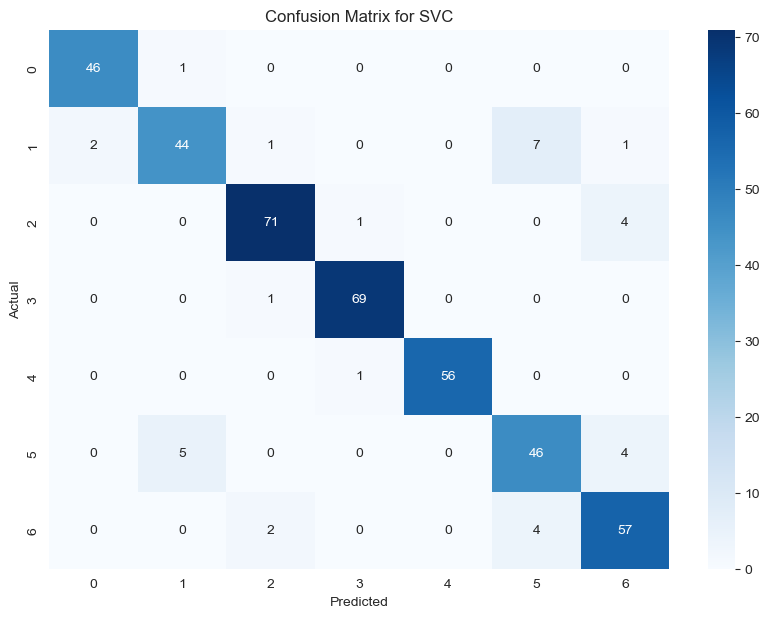

Random Forest Model Accuracy: 94.33%


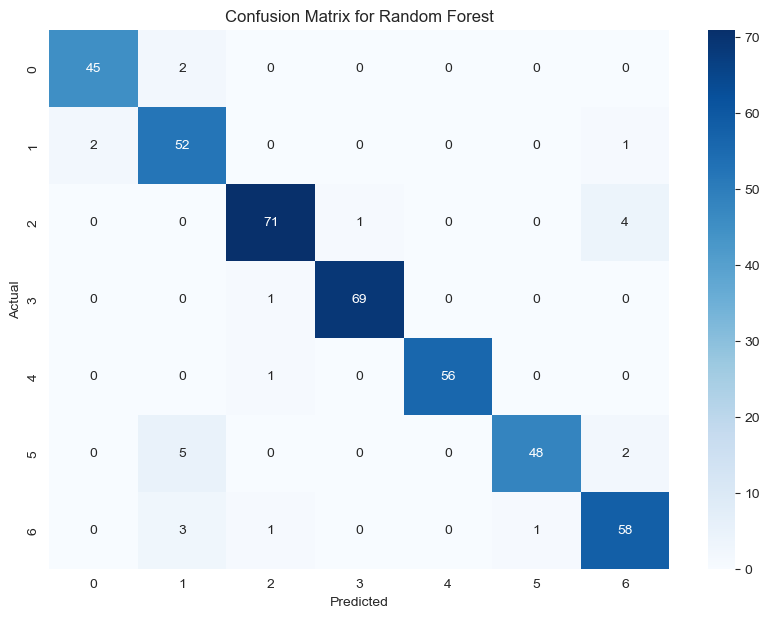

In [97]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models to compare
classifiers = {
    "SVC": SVC(random_state=24),
    "Random Forest": RandomForestClassifier(random_state=24)
}

# Initialize dictionary to store model performance
model_performance = {}

# Train each model and evaluate using accuracy
for name, classifier in classifiers.items():
    # Create a pipeline that includes preprocessing and classifier
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', classifier)])

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[name] = accuracy
    
    # Print accuracy and bonus eligibility
    print(f"{name} Model Accuracy: {accuracy * 100:.2f}%")
  

    # Calculate confusion matrix and display it
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#  Part 3: Unsupervised Learning

### Concatenate the train and validation sets from ’Part 2: Classification’ to create a "new training set".
### Using K-Means Clustering, form k number of clusters in the "new training set".

In [98]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Example DataFrames
# Assuming X_train, X_val, y_train, y_val are your datasets for features and labels respectively

# Concatenate the feature sets and the label sets
X_new_train = pd.concat([X_train, X_val])
y_new_train = pd.concat([y_train, y_val])

# If y_new_train needs to be transformed or encoded:
# If y_new_train is categorical and needs to be included in the clustering, you need to encode it
if y_new_train.dtype == 'object':
    y_new_train_encoded = pd.get_dummies(y_new_train, prefix='target')
else:
    y_new_train_encoded = y_new_train

# Combine X and Y for clustering
combined_data = pd.concat([X_new_train, y_new_train_encoded], axis=1)

# Identifying categorical and numerical columns (update with actual data column names)
categorical_cols = combined_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = combined_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(combined_data)

# Define the number of clusters
k = 5  # Choose based on domain knowledge, the Elbow method, or other analytical methods

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_preprocessed)  # Fit on the preprocessed data

# Optionally, add cluster labels to the DataFrame for analysis
combined_data['cluster'] = kmeans.labels_

# Print the first few entries to see the cluster labels
print(combined_data.head())

# Analyze cluster centers (optional, involves transforming back if needed)
print("Cluster Centers:")
print(kmeans.cluster_centers_)

      Gender        Age    Height    Weight family_history_with_overweight  \
1490  Female  43.726081  1.592316  77.00103                            yes   
95      Male  26.000000  1.700000  70.00000                            yes   
1063  Female  45.000000  1.675953  79.66832                            yes   
637     Male  18.000000  1.845399  60.00000                            yes   
104   Female  38.000000  1.560000  80.00000                            yes   

     FAVC      FCVC  NCP        CAEC SMOKE  ...        CALC  \
1490  yes  2.000000  3.0   Sometimes    no  ...   Sometimes   
95     no  3.000000  1.0  Frequently    no  ...  Frequently   
1063  yes  2.598051  3.0   Sometimes    no  ...          no   
637   yes  3.000000  4.0   Sometimes    no  ...          no   
104   yes  2.000000  3.0   Sometimes    no  ...   Sometimes   

                     MTRANS  target_Insufficient_Weight  target_Normal_Weight  \
1490             Automobile                       False                

### Now, count the number of sample labels in each cluster and classify the cluster as the majority label.

### For each sample in the test set from ’Part 2: Classification’, calculate the euclidean distance between the sample and the centroids of each cluster and classify the test sample as the label of the closest cluster.

In [99]:
from sklearn.metrics import pairwise_distances_argmin_min

# Assuming combined_data is your full training set including the 'cluster' labels from KMeans
# and that y_new_train is the target labels also included before

# Add the target label into your combined dataset if it's not already included
combined_data['target'] = y_new_train.reset_index(drop=True)

# Determine the majority label for each cluster
majority_labels = combined_data.groupby('cluster')['target'].agg(lambda x: x.value_counts().idxmax())

print("Majority labels per cluster:")
print(majority_labels)


from sklearn.preprocessing import StandardScaler

# Preprocess the test set in the same way as the training set
X_test_preprocessed = preprocessor.transform(X_test)

# Get the centroids from the trained KMeans model
centroids = kmeans.cluster_centers_

# Find the closest centroids for each sample in the test set
closest, _ = pairwise_distances_argmin_min(X_test_preprocessed, centroids)

# Map the closest clusters to their majority labels
test_predictions = [majority_labels[i] for i in closest]

# Adding these predictions to the test set DataFrame for clarity
X_test['predicted_label'] = test_predictions

print(X_test.head())


Majority labels per cluster:
cluster
0    Overweight_Level_I
1        Obesity_Type_I
2         Normal_Weight
3        Obesity_Type_I
4      Obesity_Type_III
Name: target, dtype: object
      Gender        Age    Height      Weight family_history_with_overweight  \
1695    Male  24.622054  1.756509  117.368716                            yes   
1600    Male  25.447208  1.658910  104.548794                            yes   
763     Male  21.000000  1.620000   70.000000                             no   
267     Male  38.000000  1.700000   78.000000                             no   
1458  Female  18.152876  1.694969   92.508122                            yes   

     FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
1695  yes  1.451337  3.000000   Sometimes    no  2.000000  no  1.384607   
1600  yes  2.859097  1.340361   Sometimes    no  1.530508  no  0.174475   
763   yes  2.000000  1.000000          no    no  3.000000  no  1.000000   
267   yes  3.000000  3.000000  Fre

### Iterate the four steps above for different values of k (k ≥ Number of unique labels) (e.g., k: 4,5,6...)

### Print the number of correctly classified samples and find the optimal value of k.

For k=4, the Silhouette Score is 0.1365, the inertia is: 12528.0001
For k=5, the Silhouette Score is 0.1441, the inertia is: 11585.4607
For k=6, the Silhouette Score is 0.1493, the inertia is: 10872.2404
For k=7, the Silhouette Score is 0.1544, the inertia is: 10372.3177
For k=8, the Silhouette Score is 0.1420, the inertia is: 9965.3782
For k=9, the Silhouette Score is 0.1448, the inertia is: 9627.5769


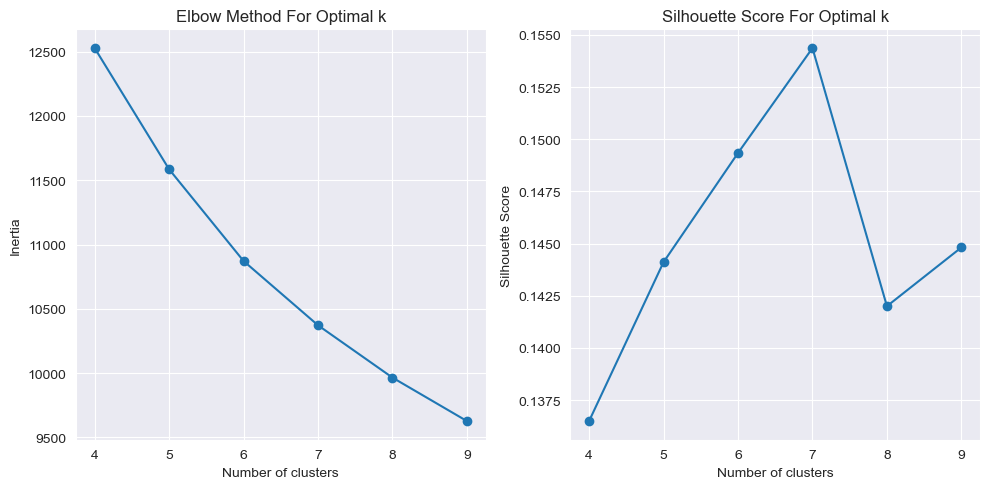

The optimal number of clusters, k, is 7 based on the silhouette score and Elbow Method.


In [100]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


X_processed = preprocessor.fit_transform(pd.concat([X_train, X_val]))

# Range of k we want to try
k_values = range(4, 10)
inertia_values = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    cluster_labels = kmeans.fit_predict(X_processed)
    inertia = kmeans.inertia_  # Sum of squared distances of samples to their closest cluster center
    inertia_values.append(inertia)
    silhouette_avg = silhouette_score(X_processed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For k={k}, the Silhouette Score is {silhouette_avg:.4f}, the inertia is: {inertia:.4f}')
    

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')  # Use inertia_values here
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Final reporting

# Determine the optimal k from silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters, k, is {optimal_k} based on the silhouette score and Elbow Method.")
